# Topic 5 Example 5
## Circuit response to exponential input

In [33]:
try:
    import lcapy
except ModuleNotFoundError:
    print("Could not find lcapy - installing")
    !sudo apt install texlive-latex-recommended # takes about 30 sec
    !sudo apt-get install texlive-latex-extra --no-install-recommends # 10 sec
    !sudo apt install imagemagick # 10 sec
    !pip install lcapy # takes 5 sec
    !pip install pdflatex # takes about 5 sec

#https://filterpy.readthedocs.io/en/latest/
from lcapy import Circuit, j, omega, s, exp, t
from lcapy import R, C, L
from lcapy import *
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

from lcapy import *

tt = np.linspace(0, 5, 1000)

Running Python: 3.8.17
Running Sympy: 1.12rc1


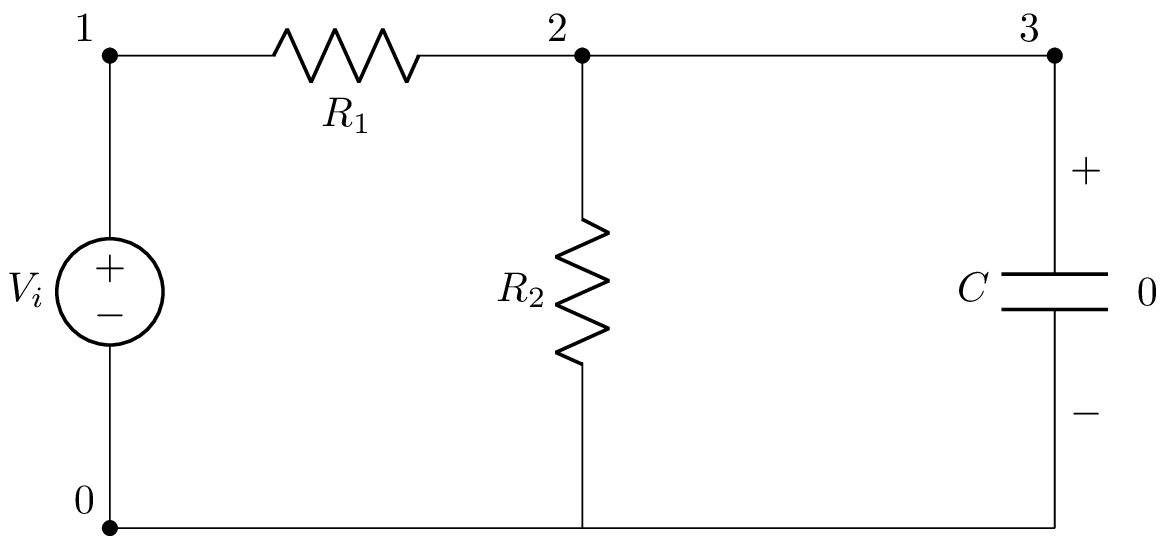

In [34]:
# Form circuit
RR1 = 1
RR2 = 2

cct2 = Circuit("""
Vi 1 0 ; down=2
R1 1 2 ; right=2
R2 2 0_2 ; down=2
W 2 3; right=2
C 3 0_3 C 0; down=2, , v=0
W 0 0_2; right
W 0_2 0_3; right""")

cct2.draw()

In [35]:
w = u(t) # find step response
cct2a = cct2.subs({'Vi':w, 'R1': RR1, 'C':1, 'R2':RR2})

#Given the step response, find the impulse response
g = diff(cct2a.C.v(t),t)
g

⎛       -3⋅t ⎞                   
⎜       ─────⎟         -3⋅t      
⎜         2  ⎟         ─────     
⎜2   2⋅ℯ     ⎟           2       
⎜─ - ────────⎟⋅δ(t) + ℯ     ⋅u(t)
⎝3      3    ⎠                   

In [36]:
w = u(t) # find step response
cct2a = cct2.subs({'Vi':w, 'R1': RR1, 'C':1, 'R2':RR2})

#Given the step response, find the impulse response
gs = cct2a.C.v(t)
g = diff(gs,t) # deriv of step response to get impulse  
g # show impulse resp

⎛       -3⋅t ⎞                   
⎜       ─────⎟         -3⋅t      
⎜         2  ⎟         ─────     
⎜2   2⋅ℯ     ⎟           2       
⎜─ - ────────⎟⋅δ(t) + ℯ     ⋅u(t)
⎝3      3    ⎠                   

## Evaluate the Impulse and Step Responses

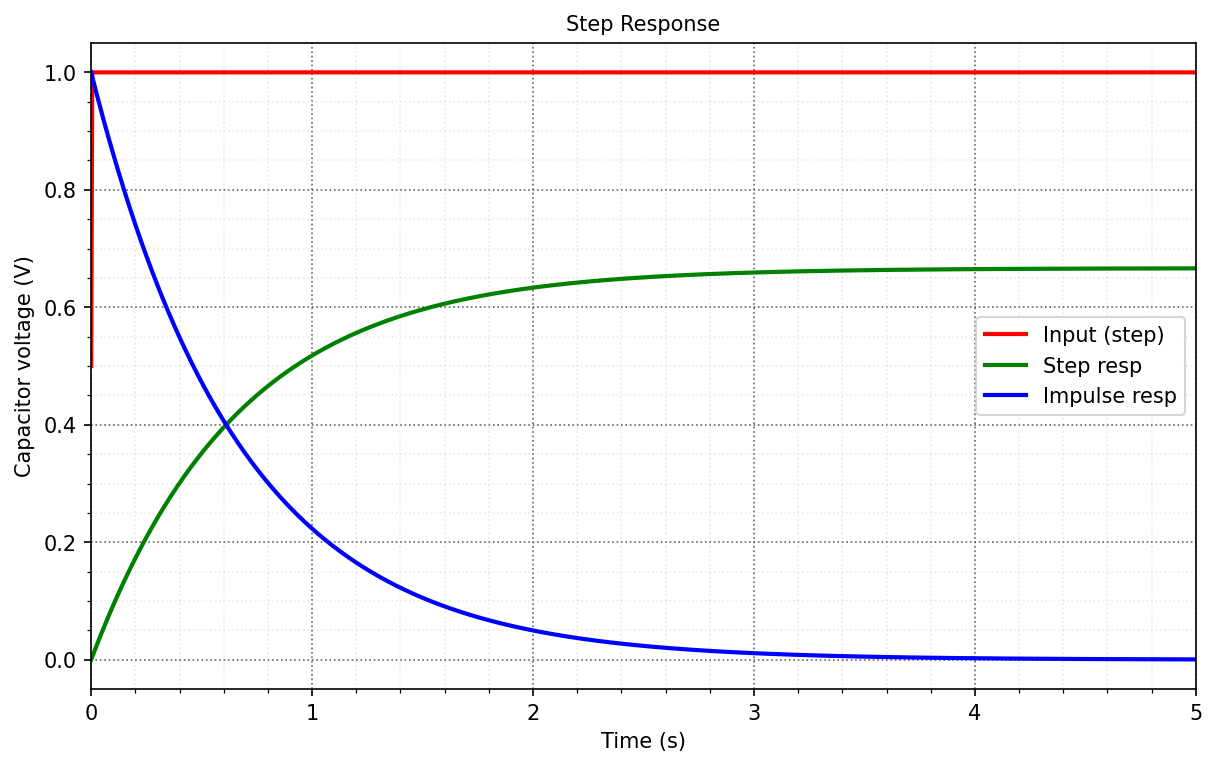

In [37]:
# find the voltage across the capacitor
tt = np.linspace(0, 5, 1000)
Vgs = gs.evaluate(tt) # step resp
Vg = g.evaluate(tt) # impulse resp

fig = figure(figsize=(8, 5),dpi=150,constrained_layout = True)
ax = fig.add_subplot(111, title='Step Response')
ax.plot(tt, w.evaluate(tt), linewidth=2, color='red', label='Input (step)') 
ax.plot(tt, Vgs, linewidth=2, color='green', label='Step resp')
ax.plot(tt, Vg, linewidth=2, color='blue', label='Impulse resp')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Capacitor voltage (V)');
nicegrid()
plt.xlim(0,5)
plt.legend()
plt.show()

## Now compute the full response to $w(t)$ and compare the 2 solutions found

In [38]:
from lcapy import exp, t
# Can apply the same technique to find 
wfull = exp(-t) * u(t)
cct2f = cct2.subs({'Vi':wfull, 'R1': RR1, 'C':1, 'R2':RR2})
Vcf = cct2f.C.v.evaluate(tt)

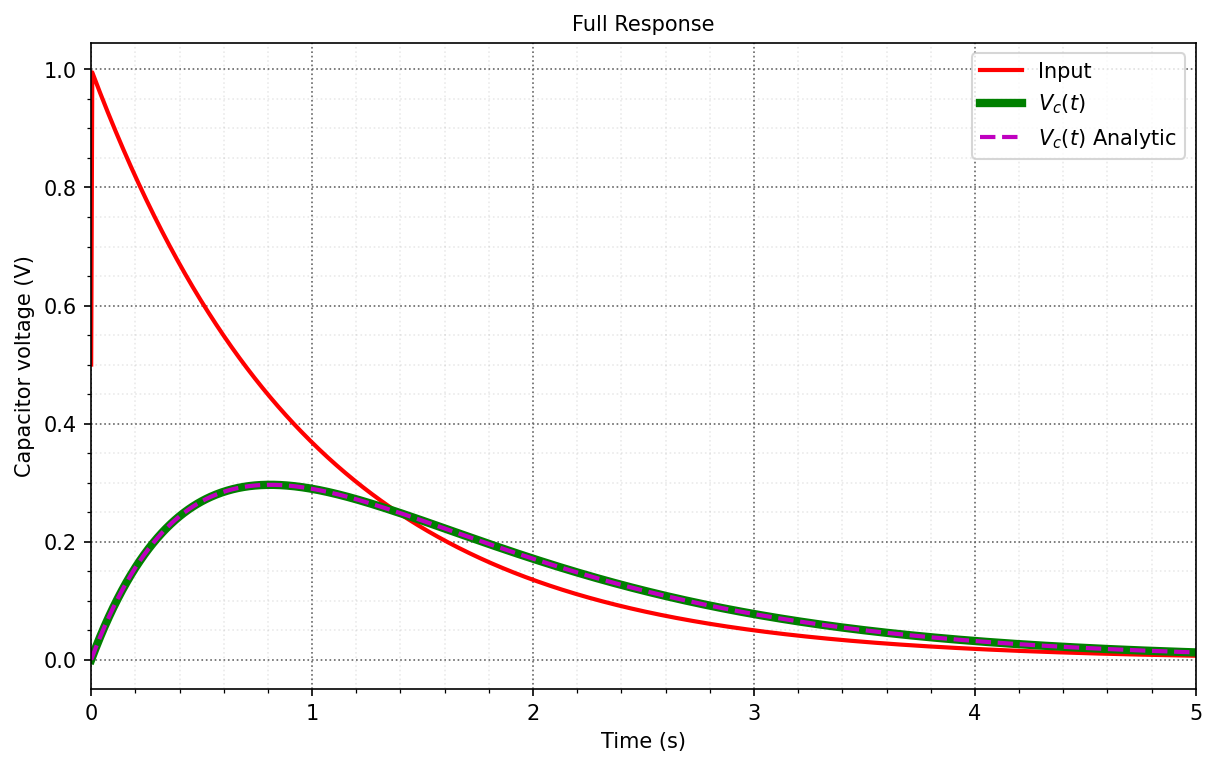

In [41]:
# Plot response to full input and compare to analytic

# compute quantities needed
Req = (1/RR1 + 1/RR2)
ReqC = Req * 1
# Expression given in notes for comparison
e_analytic = (2*(np.exp( -1 * tt) - np.exp( -1.5 * tt)))*U(tt) 

fig = figure(figsize=(8, 5),dpi=150,constrained_layout = True)
ax = fig.add_subplot(111, title='Full Response')
ax.plot(tt, cct2f.Vi.v.evaluate(tt), linewidth=2, color='red', label='Input')
ax.plot(tt, Vcf, linewidth=4, color='green', label='$V_c(t)$')
ax.plot(tt, e_analytic, 'm--',  linewidth=2, label='$V_c(t)$ Analytic')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Capacitor voltage (V)');
nicegrid()
plt.legend()
plt.xlim(0,5)
plt.show()

## Compare with a Symbolic Convolution

In [42]:
def convolve(f, g, t, lower_limit=-oo, upper_limit=oo):
    tau = Symbol('__pick_a_name__', real=True)
    return integrate(f.subs(t, tau) * g.subs(t, t - tau), (tau, lower_limit, upper_limit))
    
#from sympy import *
import sympy as sym
from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
from sympy import exp, plot, sin, cos, printing, init_printing, simplify
from sympy.testing.pytest import ignore_warnings
print("Running Sympy:",sym.__version__)
#init_printing(use_unicode=True)
ts = Symbol('t')

Running Sympy: 1.12rc1


In [43]:
f1 = exp(-1.5*ts)*Heaviside(ts) # impulse resp
f2 = exp(-1*ts)*Heaviside(ts) # input
f3 = convolve(f1, f2, ts, 0 , ts) # full response
# check funational form found
pprint(f3)

lam_f1 = lambdify(ts, f1, modules=['numpy'])
lam_f2 = lambdify(ts, f2, modules=['numpy'])
lam_f3 = lambdify(ts, f3, modules=['numpy'])

⎛       -1.5⋅t        -t⎞     2
⎝- 2.0⋅ℯ       + 2.0⋅ℯ  ⎠⋅u(t) 


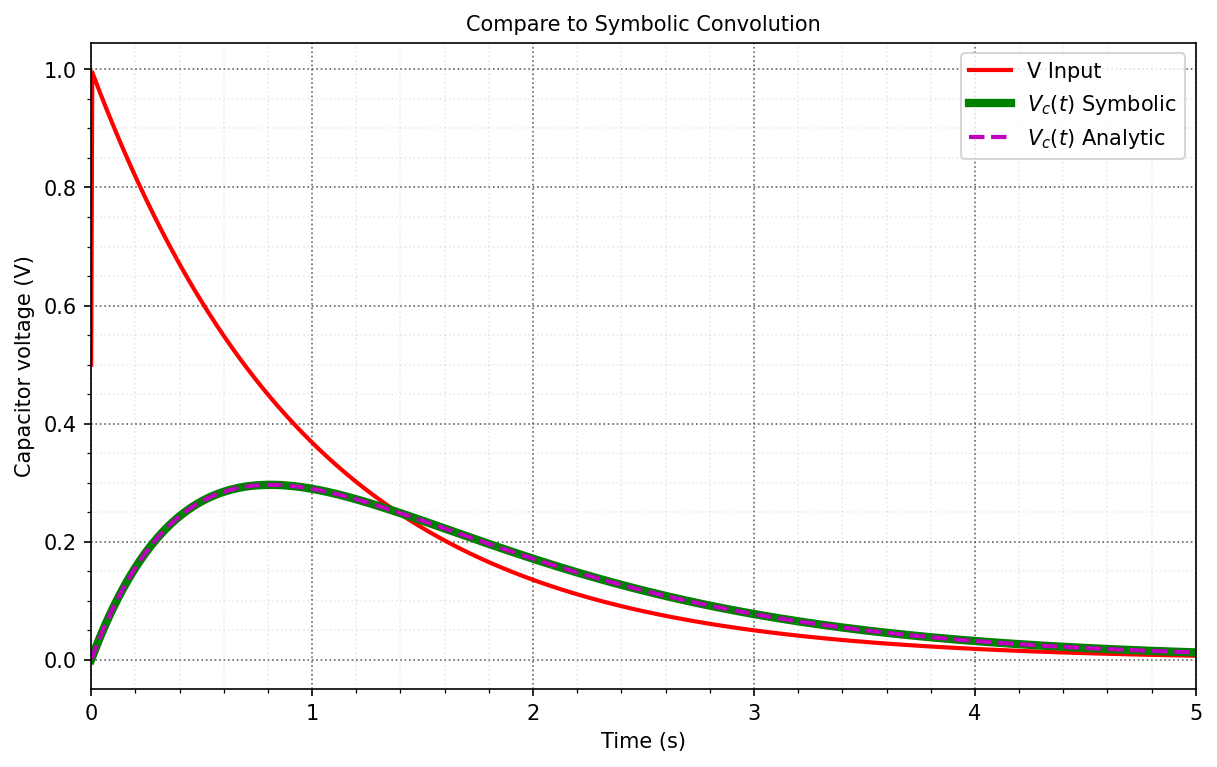

In [44]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(tt, lam_f2(tt),'r',label='V Input')
plt.plot(tt, lam_f3(tt),linewidth=4, ls='-', c='g', label='$V_c(t)$ Symbolic')
plt.plot(tt, e_analytic, 'm--', linewidth=2, label='$V_c(t)$ Analytic')

nicegrid()
plt.legend()
plt.xlim(0,5)
plt.xlabel('Time (s)')
plt.ylabel('Capacitor voltage (V)')
plt.title('Compare to Symbolic Convolution')
plt.show()